In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]

y = y.astype('uint8')

print('X: ', X)
print('y: ', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.scatter(X[y == 2][:, 0], y[y == 2], color='g', label='2')
plt.legend()

X:  [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:  [0 0 0 1 1 1]


In [3]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

print(X)

[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [24]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

N = 3 # number of points per class
D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.array([[0.1, 0.05], [0.2, -0.1]])

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

print('theta: ',theta)

losses = []
num_iter = 1

num_sample_stochastic = 1
for epoch in range(num_iter):
    for i in range(num_examples): 
        xi = X[i:i+1]
        xi = xi.T
        yi = y[i:i+1]
        print('xi: ', xi)
        print('yi: ', yi)
        
        print('theta.T: ', theta.T)
        
        # evaluate class scores
        scores = np.dot(theta.T, xi) 
        print('Z: ', scores)
        
        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        print('exp_scores: ', exp_scores)
        print('probs: ', probs)
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)])
        print('corect_logprobs: ', corect_logprobs)
        loss = np.sum(corect_logprobs)/1
        print('loss: ', loss)
                
        # compute the gradient on scores
        dscores = probs
        dscores[range(num_sample_stochastic),yi] -= 1
        print('dscores 1: ', dscores)
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)
        print('dtheta: ', dtheta)

        # perform a parameter update
        theta += -learning_rate *dtheta        
        print('theta: ', theta)
                
        break

theta:  [[ 0.1   0.05]
 [ 0.2  -0.1 ]]
xi:  [[1. ]
 [1.4]]
yi:  [0]
theta.T:  [[ 0.1   0.2 ]
 [ 0.05 -0.1 ]]
Z:  [[ 0.38]
 [-0.09]]
exp_scores:  [[1.46228459]
 [0.91393119]]
probs:  [[0.61538376]
 [0.38461624]]
corect_logprobs:  [0.48550921]
loss:  0.48550921164700406
dscores 1:  [[-0.38461624]
 [ 0.38461624]]
dtheta:  [[-0.38461624  0.38461624]
 [-0.53846274  0.53846274]]
theta:  [[ 0.13846162  0.01153838]
 [ 0.25384627 -0.15384627]]


In [34]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

N = 3 # number of points per class
D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.array([[0.1, 0.05], [0.2, -0.1]])

# gradient descent loop
num_examples = X.shape[0]
learning_rate = 0.1

losses = []
num_iter = 100

num_sample_stochastic = 1
for epoch in range(num_iter):
    for i in range(num_examples): 
        xi = X[i:i+1]
        xi = xi.T
        yi = y[i:i+1]
        
        # evaluate class scores
        scores = np.dot(theta.T, xi)
        
        #compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        
        # compute the loss
        corect_logprobs = -np.log(probs[yi, range(num_sample_stochastic)])
        loss = np.sum(corect_logprobs)
        losses.append(loss)
                
        # compute the gradient on scores
        dscores = probs
        dscores[yi,0] -= 1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T)

        # perform a parameter update
        theta += -learning_rate *dtheta

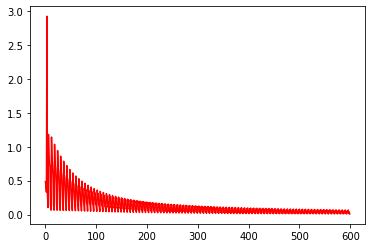

In [35]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [37]:
# evaluate training set accuracy
scores = np.dot(theta.T, X.T)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 1.00
